### ***Task 1***

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('/content/drive/MyDrive/smartbridge assignment 20bce7316/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [75]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [76]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [77]:
df['Drug'].replace({'DrugY':'drugY'})

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [78]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

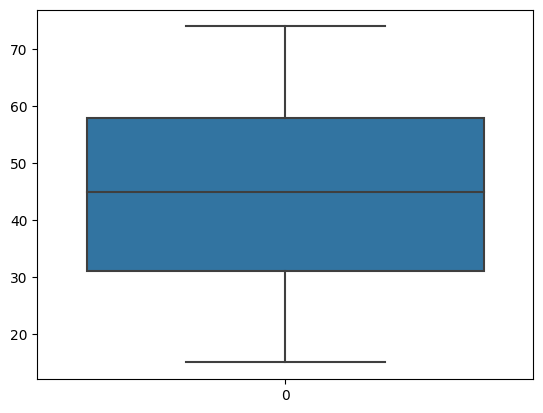

In [80]:
sns.boxplot(df['Age'])

<Axes: >

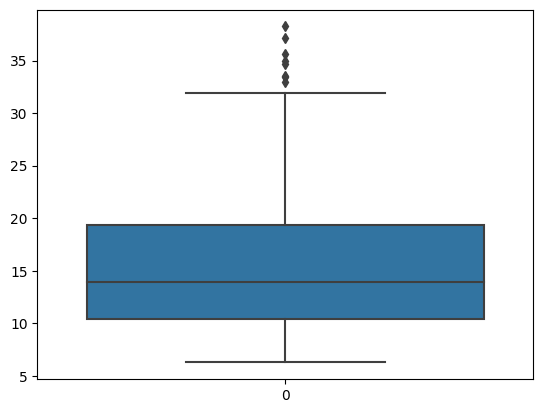

In [81]:
sns.boxplot(df['Na_to_K'])

In [82]:
#outliner
q1=df.Na_to_K.quantile(0.25)
q3=df.Na_to_K.quantile(0.75)
IQR=q3-q1
print(IQR)
UL=q3+1.5*IQR



8.9345


In [83]:
print(df['Na_to_K'].median())

13.9365


In [84]:
df['Na_to_K']=np.where(df['Na_to_K']>UL,13.9356,df['Na_to_K'])

<Axes: >

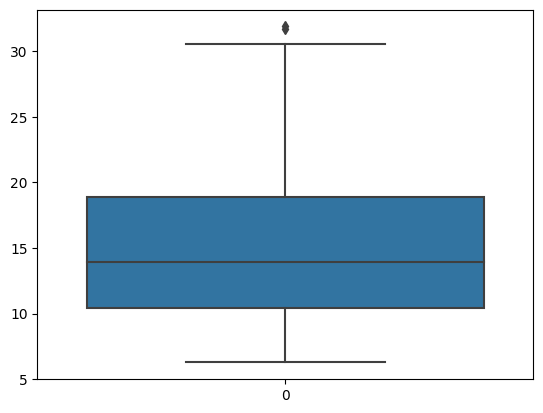

In [85]:
sns.boxplot(df['Na_to_K'])

In [86]:
#outliner
q1=df.Na_to_K.quantile(0.25)
q3=df.Na_to_K.quantile(0.75)
IQR=q3-q1
print(IQR)
UL=q3+1.5*IQR


8.409000000000002


In [87]:
print(df['Na_to_K'].median())

13.935300000000002


In [88]:
df['Na_to_K']=np.where(df['Na_to_K']>UL,13.935300000000002,df['Na_to_K'])

<Axes: >

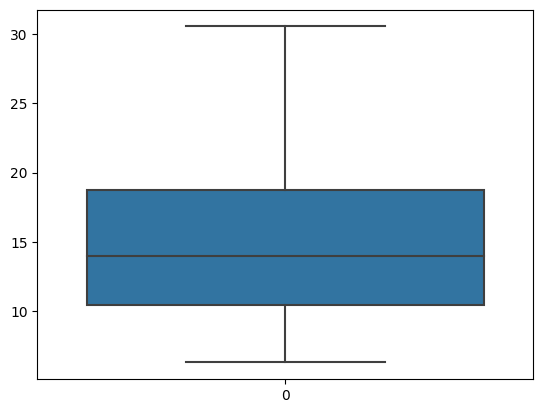

In [89]:
sns.boxplot(df['Na_to_K'])

In [90]:
from matplotlib.ticker import scale_range
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['BP']=le.fit_transform(df['BP'])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df['Drug']=le.fit_transform(df['Drug'])

scaler=MinMaxScaler()
df[['Age','Na_to_K']]=scaler.fit_transform(df[['Age','Na_to_K']])

In [91]:
df.drop(['Drug'],axis=1)

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.135593,0,0,0,0.785464
1,0.542373,1,1,0,0.280835
2,0.542373,1,1,0,0.158237
3,0.220339,0,2,0,0.062924
4,0.779661,0,1,0,0.484547
...,...,...,...,...,...
195,0.694915,0,1,0,0.218034
196,0.016949,1,1,0,0.236100
197,0.627119,1,2,0,0.149183
198,0.135593,1,2,1,0.318984


In [92]:
x = df.iloc[:,0:5]
x


,Age,Sex,BP,Cholesterol,Na_to_K
0,0.135593,0,0,0,0.785464
1,0.542373,1,1,0,0.280835
2,0.542373,1,1,0,0.158237
3,0.220339,0,2,0,0.062924
4,0.779661,0,1,0,0.484547
...,...,...,...,...,...
195,0.694915,0,1,0,0.218034
196,0.016949,1,1,0,0.236100
197,0.627119,1,2,0,0.149183
198,0.135593,1,2,1,0.318984


In [93]:
y = df['Drug']
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

Spliting data into training and testing

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [96]:
x.shape, y.shape

((200, 5), (200,))

In [97]:
xtrain.shape, xtest.shape

((160, 5), (40, 5))

In [98]:
ytrain.shape, ytest.shape

((160,), (40,))

### ***Task 2***

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Accuracy is checked with different models


In [100]:
#ANN with 4 hidden layers

model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

In [101]:
model.compile(optimizer='adam',loss='mse',metrics=['Accuracy'])


In [102]:
model.fit(xtrain,ytrain,batch_size=4,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
40/40 [==============================] - 2s 21ms/step - loss: 4.7221 - Accuracy: 0.4500 - val_loss: 5.2663 - val_Accuracy: 0.2500
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 3.5144 - Accuracy: 0.1813 - val_loss: 3.6099 - val_Accuracy: 0.0500
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 2.9834 - Accuracy: 0.1875 - val_loss: 3.3137 - val_Accuracy: 0.1000
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 2.4461 - Accuracy: 0.2313 - val_loss: 2.6030 - val_Accuracy: 0.1250
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 2.0082 - Accuracy: 0.2313 - val_loss: 2.1846 - val_Accuracy: 0.1250
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 1.8333 - Accuracy: 0.2625 - val_loss: 2.2499 - val_Accuracy: 0.1500
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 1.7175 - Accuracy: 0.2562 - val_loss: 2.9027 - val_Accuracy: 0.2000
Epoch 8/100


In [103]:
#ANN with 4 hidden layers

model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['Accuracy'])
model.fit(xtrain,ytrain,batch_size=4,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 4.5245 - Accuracy: 0.4437 - val_loss: 5.3126 - val_Accuracy: 0.3000
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 3.1790 - Accuracy: 0.1750 - val_loss: 3.3724 - val_Accuracy: 0.0500
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 2.4164 - Accuracy: 0.1312 - val_loss: 2.7023 - val_Accuracy: 0.0500
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 2.1580 - Accuracy: 0.1312 - val_loss: 2.6574 - val_Accuracy: 0.0500
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 2.0774 - Accuracy: 0.1937 - val_loss: 2.6167 - val_Accuracy: 0.1000
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 2.0592 - Accuracy: 0.2750 - val_loss: 2.5764 - val_Accuracy: 0.1750
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 1.9260 - Accuracy: 0.2500 - val_loss: 2.3918 - val_Accuracy: 0.1000
Epoch 8/100
4

In [104]:
#ANN with 4 hidden layers

model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['Accuracy'])
model.fit(xtrain,ytrain,batch_size=4,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
40/40 [==============================] - 2s 7ms/step - loss: 4.2428 - Accuracy: 0.3688 - val_loss: 4.0096 - val_Accuracy: 0.0250
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 2.8007 - Accuracy: 0.1312 - val_loss: 3.1649 - val_Accuracy: 0.0500
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 2.3839 - Accuracy: 0.1375 - val_loss: 2.8447 - val_Accuracy: 0.0500
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 2.0383 - Accuracy: 0.1813 - val_loss: 2.4335 - val_Accuracy: 0.1500
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 1.6059 - Accuracy: 0.2438 - val_loss: 1.8154 - val_Accuracy: 0.2000
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4082 - Accuracy: 0.3438 - val_loss: 1.6465 - val_Accuracy: 0.2750
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2491 - Accuracy: 0.3688 - val_loss: 1.4604 - val_Accuracy: 0.3000
Epoch 8/100
4

### ***Task 3***

In [105]:
ypred=model.predict([[0.8,1,0.9,0.9,0.85]])
print(ypred)

1/1 [==============================] - 0s 135ms/step
[[-0.01275115]]


In [106]:
ypred=np.argmax(ypred)
ypred

0

In [107]:
output=['drugY','drugX','drugA','drugC','drugB']
output[ypred]

'drugY'

In [108]:
test_l,test_accuracy=model.evaluate(xtest,ytest)
print(test_accuracy*100)

2/2 [==============================] - 0s 8ms/step - loss: 0.2499 - Accuracy: 0.4500
44.999998807907104
